# Step 1: Install Required Libraries and import data

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# Step 2: Load MovieLens 100k Data
ratings_path = 'ml-100k/u.data'

# The separator is '\t'
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
ratings_df = pd.read_csv(ratings_path, sep='\t', names=column_names)

# Step 3: View first 5 rows
print("First 5 entries of the dataset\n")
print(ratings_df.head())
print("\n\nInfo of the dataset\n")
print(ratings_df.info())
print("\n\nDescription of the dataset\n")
print(ratings_df.describe())


First 5 entries of the dataset

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


Info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None


Description of the dataset

            user_id        item_id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000     

In [3]:
# Load movie metadata 
item_cols = [
    'item_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL',
    'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
    'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'
]

# Load the file
movies_df = pd.read_csv('ml-100k/u.item', sep='|', names=item_cols, encoding='latin-1')

# Preview
movies_df.head()
# movies_df.shape


,item_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


### Load User Demographics

In [4]:
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']

users_df = pd.read_csv('ml-100k/u.user', sep='|', names=user_cols)

# Preview
users_df.head()


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Merge Metadata with Ratings

In [5]:
# Merge ratings with movies
ratings_df = ratings_df.merge(movies_df[['item_id', 'movie_title'] + item_cols[5:]], on='item_id')

# Merge in user demographics
ratings_df = ratings_df.merge(users_df, on='user_id')

# Final preview
ratings_df.head()


,user_id,item_id,rating,timestamp,movie_title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code
0,196,242,3,881250949,Kolya (1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,49,M,writer,55105
1,186,302,3,891717742,L.A. Confidential (1997),0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,39,F,executive,00000
2,22,377,1,878887116,Heavyweights (1994),0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,25,M,writer,40206
3,244,51,2,880606923,Legends of the Fall (1994),0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,28,M,technician,80525
4,166,346,1,886397596,Jackie Brown (1997),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,47,M,educator,55113


# Step 2: Data Cleaning

In [6]:
# Check for missing values
ratings_df.isnull().sum()

user_id        0
item_id        0
rating         0
timestamp      0
movie_title    0
unknown        0
Action         0
Adventure      0
Animation      0
Children's     0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
age            0
gender         0
occupation     0
zip_code       0
dtype: int64

In [7]:
# Check for duplicate entries
duplicate_count = ratings_df.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

Duplicate rows: 0


In [8]:
# Inspect data types
ratings_df.dtypes

user_id         int64
item_id         int64
rating          int64
timestamp       int64
movie_title    object
unknown         int64
Action          int64
Adventure       int64
Animation       int64
Children's      int64
Comedy          int64
Crime           int64
Documentary     int64
Drama           int64
Fantasy         int64
Film-Noir       int64
Horror          int64
Musical         int64
Mystery         int64
Romance         int64
Sci-Fi          int64
Thriller        int64
War             int64
Western         int64
age             int64
gender         object
occupation     object
zip_code       object
dtype: object

In [9]:
# Check the unique values
print("Unique users:", ratings_df['user_id'].nunique())
print("Unique movies:", ratings_df['item_id'].nunique())


Unique users: 943
Unique movies: 1682


# Step 3: Exploratory Data Analysis (EDA)


### 3.1. Distribution of ratings

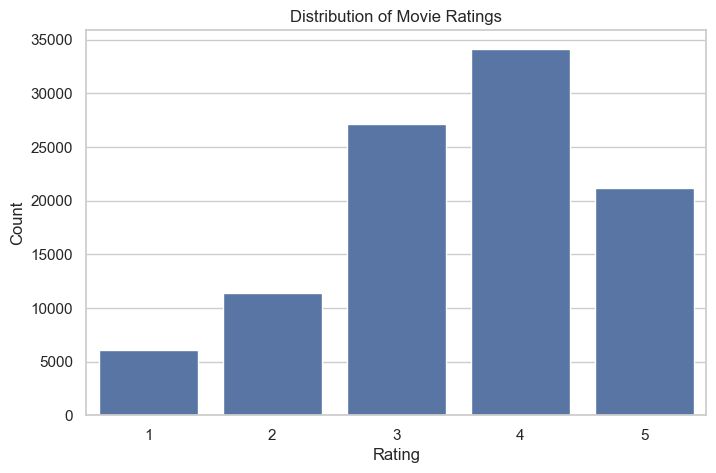

In [10]:
# Plot distribution of ratings
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=ratings_df)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### 3.2 Number of ratings per user

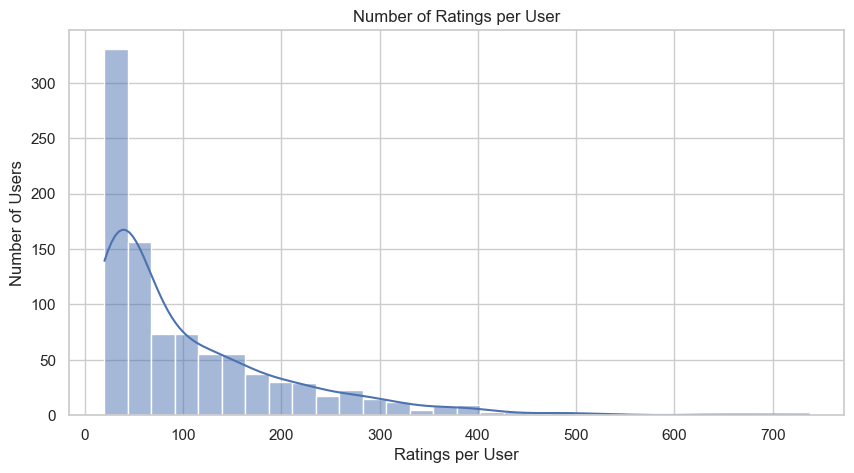

In [11]:
# Ratings per user
ratings_per_user = ratings_df.groupby('user_id')['rating'].count()

plt.figure(figsize=(10,5))
sns.histplot(ratings_per_user, bins=30, kde=True)
plt.title("Number of Ratings per User")
plt.xlabel("Ratings per User")
plt.ylabel("Number of Users")
plt.show()


### 3.3 Number of ratings per movie

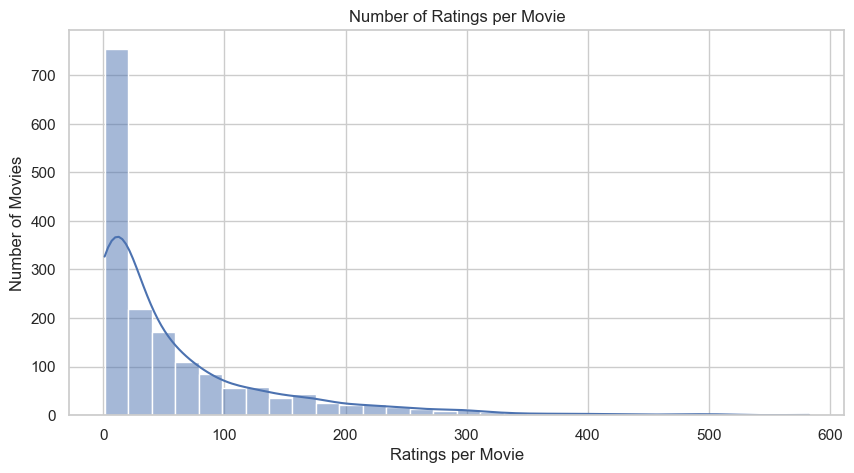

In [12]:
# Ratings per movie
ratings_per_movie = ratings_df.groupby('item_id')['rating'].count()

plt.figure(figsize=(10,5))
sns.histplot(ratings_per_movie, bins=30, kde=True)
plt.title("Number of Ratings per Movie")
plt.xlabel("Ratings per Movie")
plt.ylabel("Number of Movies")
plt.show()


### 3.4 Outlier Check

In [13]:
# Summary statistics for ratings per user and per movie
print("Ratings per User:")
print(ratings_per_user.describe())

print("\nRatings per Movie:")
print(ratings_per_movie.describe())


Ratings per User:
count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: rating, dtype: float64

Ratings per Movie:
count    1682.000000
mean       59.453032
std        80.383846
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       583.000000
Name: rating, dtype: float64


### Insights

#### Users:
Some users are very active **(more than 700 ratings)**.

Many users are less active (e.g., 25% of users gave < 33 ratings).

This imbalance could bias the model toward heavy users.

We'll keep this in mind during feature engineering or modeling, especially if we do any normalization or filtering.

#### Movies:

Some movies have very few ratings **(even just 1)**, which means the model may not learn useful patterns for them.
We might consider filtering out low-frequency movies for better model performance, depending on your strategy.

### 3.5 Correlation Matrix

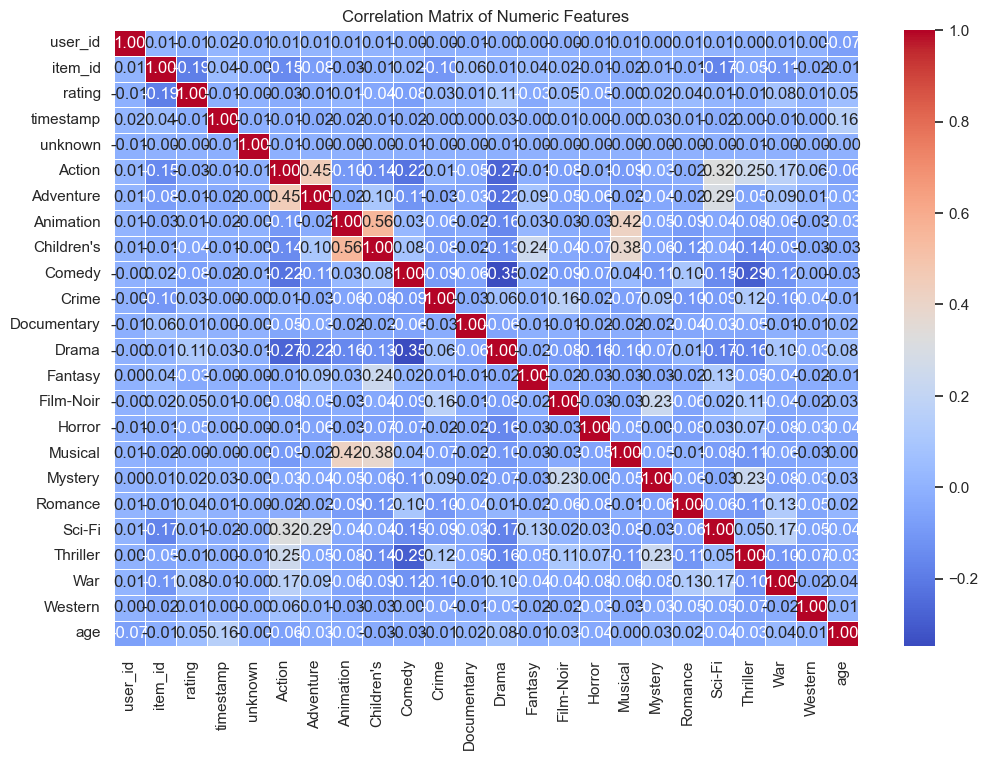

In [14]:
# Select only numeric columns for correlation matrix
numeric_cols = ratings_df.select_dtypes(include=['number'])

# Compute correlation
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


### 3.6 Boxplot: Ratings by Genre

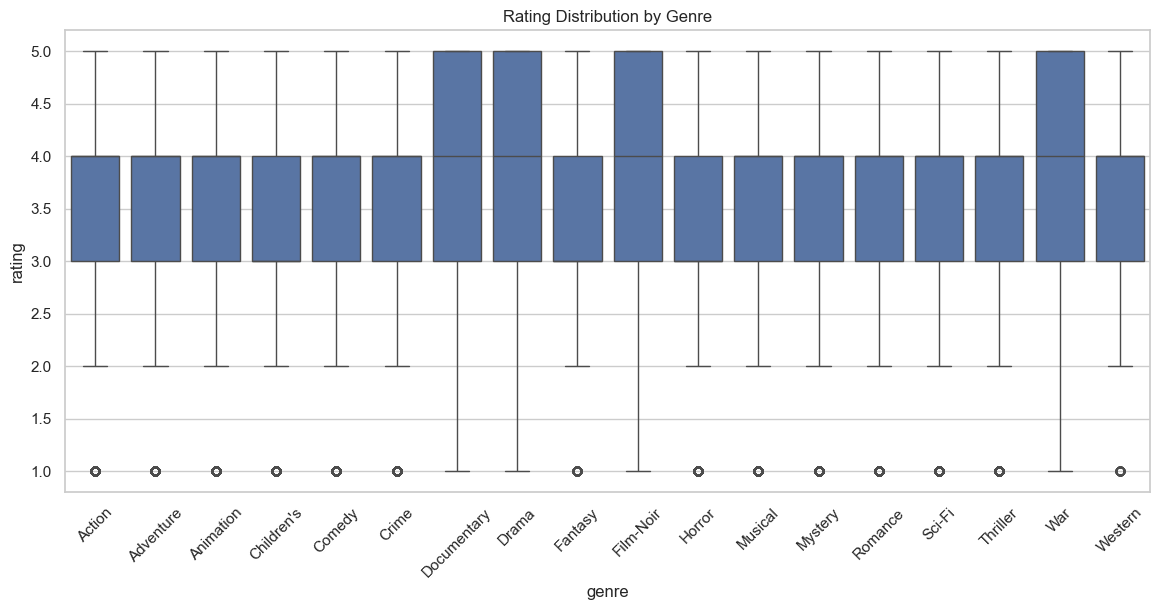

In [15]:
# Melt genre columns to long format for boxplot
genre_cols = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime',
              'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
              'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# Melt the dataframe to long format
genre_ratings = ratings_df.melt(id_vars=['rating'], value_vars=genre_cols,
                                     var_name='genre', value_name='is_genre')

# Filter rows where the movie belongs to that genre
genre_ratings = genre_ratings[genre_ratings['is_genre'] == 1]

# Boxplot
plt.figure(figsize=(14,6))
sns.boxplot(x='genre', y='rating', data=genre_ratings)
plt.xticks(rotation=45)
plt.title("Rating Distribution by Genre")
plt.show()


### 3.7 Boxplot: Ratings by Age Group


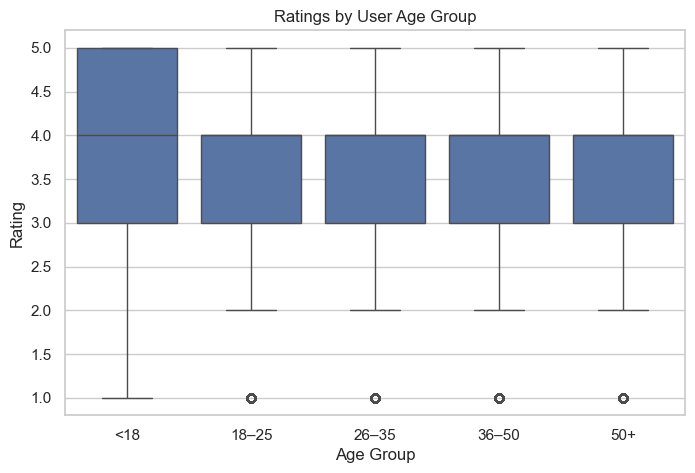

In [16]:
# Create age groups
ratings_df['age_group'] = pd.cut(ratings_df['age'], bins=[0, 18, 25, 35, 50, 100],
                                     labels=['<18', '18–25', '26–35', '36–50', '50+'])

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='age_group', y='rating', data=ratings_df)
plt.title("Ratings by User Age Group")
plt.xlabel("Age Group")
plt.ylabel("Rating")
plt.show()


### 3.8 Ratings by Gender

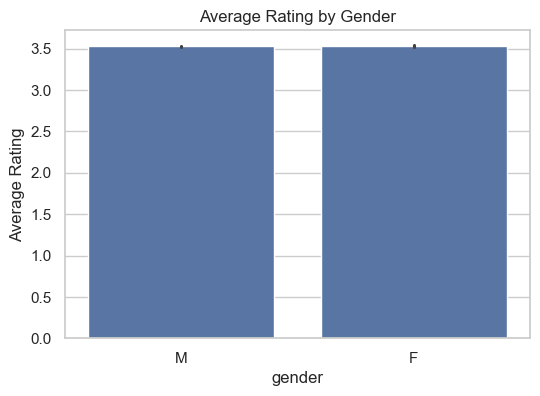

In [17]:
plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='rating', data=ratings_df)
plt.title("Average Rating by Gender")
plt.ylabel("Average Rating")
plt.show()

### 3.9 Outlier Visualization (Boxplot)

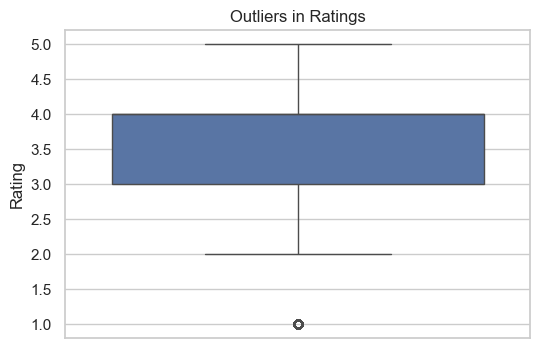

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(y='rating', data=ratings_df)
plt.title("Outliers in Ratings")
plt.ylabel("Rating")
plt.show()


# Step 4: Feature Engineering

**Objective**: Create new features from existing ones to help the model learn better patterns and improve prediction accuracy.

**Why does this Matters**: Raw data isn’t always optimal for machine learning. Good features make patterns easier to learn.

### 4.1 Convert timestamp to datetime features (year, month, weekday, etc.)


In [19]:
# Convert UNIX timestamp to datetime format
ratings_df['datetime'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

# Extract year, month, and weekday from datetime
ratings_df['rating_year'] = ratings_df['datetime'].dt.year
ratings_df['rating_month'] = ratings_df['datetime'].dt.month
ratings_df['rating_weekday'] = ratings_df['datetime'].dt.weekday

# Preview new features
ratings_df[['timestamp', 'datetime', 'rating_year', 'rating_month', 'rating_weekday']].head()


,timestamp,datetime,rating_year,rating_month,rating_weekday
0,881250949,1997-12-04 15:55:49,1997,12,3
1,891717742,1998-04-04 19:22:22,1998,4,5
2,878887116,1997-11-07 07:18:36,1997,11,4
3,880606923,1997-11-27 05:02:03,1997,11,3
4,886397596,1998-02-02 05:33:16,1998,2,0


### 4.2 Create average rating per user


In [20]:
# Calculate average rating given by each user
user_avg_rating = ratings_df.groupby('user_id')['rating'].mean().rename('user_avg_rating')

# Merge back into original DataFrame
ratings_df = ratings_df.merge(user_avg_rating, on='user_id')


### 4.3 Average Rating per Movie

In [21]:
# Calculate average rating for each movie
movie_avg_rating = ratings_df.groupby('item_id')['rating'].mean().rename('movie_avg_rating')

# Merge into main DataFrame
ratings_df = ratings_df.merge(movie_avg_rating, on='item_id')


### 4.4 Encode gender and occupation

In [22]:
# One-hot encode gender and occupation
encoded_users = pd.get_dummies(ratings_df[['gender', 'occupation']], drop_first=True)

# Add to main feature set
ratings_df = pd.concat([ratings_df, encoded_users], axis=1)


### 4.5 Add age and genre columns

In [23]:
genre_cols = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime',
              'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
              'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# One-hot encoded columns
one_hot_cols = list(encoded_users.columns)

# Final feature list
final_features = [
    'user_avg_rating', 'movie_avg_rating',
    'user_rating_count', 'movie_rating_count',
    'rating_year', 'rating_month', 'rating_weekday',
    'age'
] + genre_cols + one_hot_cols



### 4.4. Number of Ratings per User & Movie

In [24]:
# Count of ratings per user
user_rating_count = ratings_df.groupby('user_id')['rating'].count().rename('user_rating_count')
ratings_df = ratings_df.merge(user_rating_count, on='user_id')

# Count of ratings per movie
movie_rating_count = ratings_df.groupby('item_id')['rating'].count().rename('movie_rating_count')
ratings_df = ratings_df.merge(movie_rating_count, on='item_id')


In [25]:
ratings_df.head()

,user_id,item_id,rating,timestamp,movie_title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,gender,occupation,zip_code,age_group,datetime,rating_year,rating_month,rating_weekday,user_avg_rating,movie_avg_rating,gender_M,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,occupation_healthcare,occupation_homemaker,occupation_lawyer,occupation_librarian,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer,user_rating_count,movie_rating_count
0,196,242,3,881250949,Kolya (1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,49,M,writer,55105,36–50,1997-12-04 15:55:49,1997,12,3,3.615385,3.991453,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,39,117
1,186,302,3,891717742,L.A. Confidential (1997),0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,39,F,executive,00000,36–50,1998-04-04 19:22:22,1998,4,5,3.413043,4.161616,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,92,297
2,22,377,1,878887116,Heavyweights (1994),0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,25,M,writer,40206,18–25,1997-11-07 07:18:36,1997,11,4,3.351562,2.153846,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,128,13
3,244,51,2,880606923,Legends of the Fall (1994),0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,28,M,technician,80525,26–35,1997-11-27 05:02:03,1997,11,3,3.651261,3.456790,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,238,81
4,166,346,1,886397596,Jackie Brown (1997),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,47,M,educator,55113,36–50,1998-02-02 05:33:16,1998,2,0,3.550000,3.642857,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,20,126


## Feature Engineering, importance and achievements

| **Feature**                              | **Description**                          | **Why It’s Useful**                                             |
|------------------------------------------|------------------------------------------|------------------------------------------------------------------|
| `rating_year`, `rating_month`, `rating_weekday` | Timestamp of when the rating occurred     | Helps identify seasonal trends and day-of-week effects          |
| `user_avg_rating`                        | Average rating given by a user           | Reveals user behavior (e.g., lenient vs. strict raters)         |
| `movie_avg_rating`                       | Average rating received by a movie       | Indicates general popularity or audience perception             |
| `user_rating_count`, `movie_rating_count`| Number of ratings by user or for movie   | Higher counts suggest more reliable and stable patterns         |


# Step 5: Train/Test Split!

In [26]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [27]:
from sklearn.model_selection import train_test_split

# We should make sure same user's ratings do not appear in both training and testing sets.
# This Ensures the model learns from certain users and is tested on new ones.

# Step 1: Get a list of unique users
unique_users = ratings_df['user_id'].unique()

# Step 2: Split users into train and test groups (80/20)
train_users, test_users = train_test_split(unique_users, test_size=0.2, random_state=42)

# Filter ratings_df first using the existing user split
train_df = ratings_df[ratings_df['user_id'].isin(train_users)].copy()
test_df = ratings_df[ratings_df['user_id'].isin(test_users)].copy()

# Now create X and y using only the filtered data
X_train = train_df[final_features]
y_train = train_df['rating']

X_test = test_df[final_features]
y_test = test_df['rating']

# Check sizes
print("Train set size:", train_df.shape)
print("Test set size:", test_df.shape)


Train set size: (79734, 58)
Test set size: (20266, 58)


# Step 6: Model Training

#### Train a regression model to predict the rating given by a user for a movie.

### 6.1 Select features and target

In [43]:
# Already done in previous section

# Features we’ll use
# feature_cols = [
#     'user_avg_rating', 
#     'movie_avg_rating',
#     'user_rating_count',
#     'movie_rating_count',
#     'rating_year',
#     'rating_month',
#     'rating_weekday'
# ]

# # Target column
# target_col = 'rating'

# # Split into X (features) and y (target)
# X_train = train_df[feature_cols]
# y_train = train_df[target_col]

# X_test = test_df[feature_cols]
# y_test = test_df[target_col]


## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression → MAE: {mae_lr:.4f}, MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}")


Linear Regression → MAE: 0.7203, MSE: 0.8259, R²: 0.3102


## Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting → MAE: {mae_gb:.4f}, MSE: {mse_gb:.4f}, R²: {r2_gb:.4f}")


Gradient Boosting → MAE: 0.7210, MSE: 0.8217, R²: 0.3137


## Random Forest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit on training data
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.7439
Mean Squared Error (MSE): 0.8761
R² Score: 0.2683


### Models Comparision

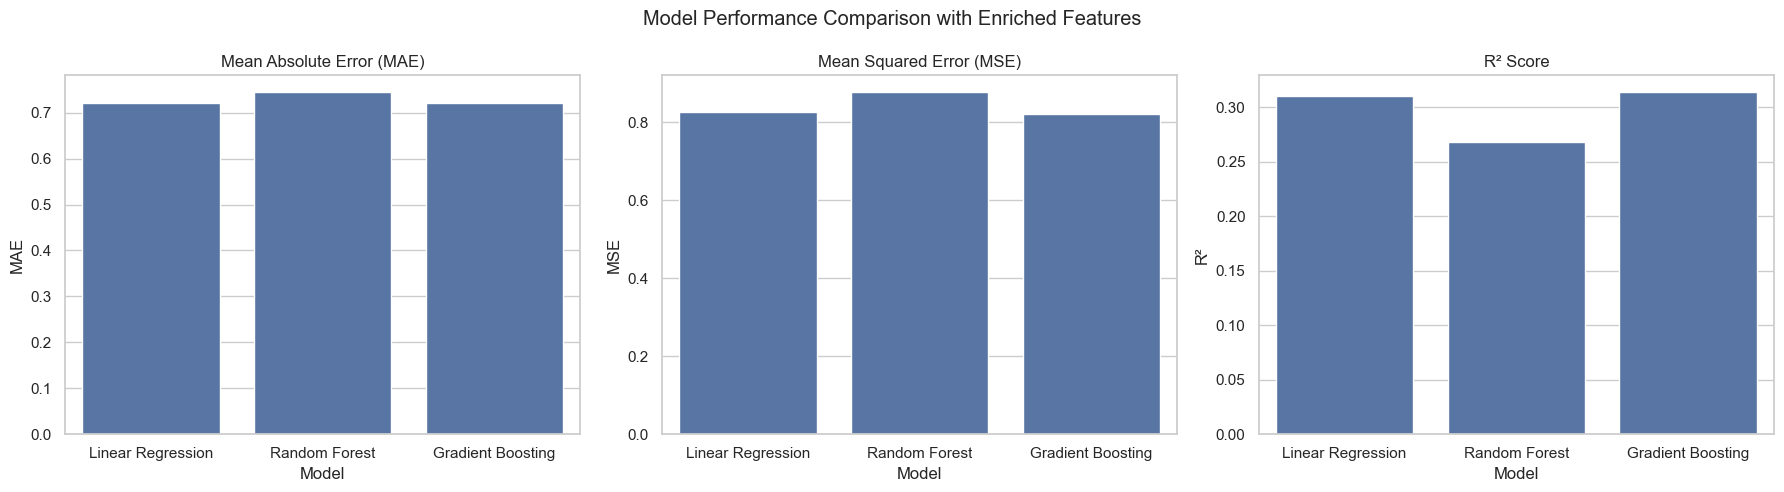

In [42]:
# Combine results into a DataFrame
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE': [mae_lr, mae_rf, mae_gb],
    'MSE': [mse_lr, mse_rf, mse_gb],
    'R²': [r2_lr, r2_rf, r2_gb]
})

# Plot comparison
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x='Model', y='MAE', data=results, ax=axes[0])
axes[0].set_title('Mean Absolute Error (MAE)')

sns.barplot(x='Model', y='MSE', data=results, ax=axes[1])
axes[1].set_title('Mean Squared Error (MSE)')

sns.barplot(x='Model', y='R²', data=results, ax=axes[2])
axes[2].set_title('R² Score')

plt.suptitle("Model Performance Comparison with Enriched Features")
plt.tight_layout()
plt.show()


# Step 7: Hyperparameter Tuning

**Objective**: Find the best settings for our model to improve accuracy. We’ll use Grid Search to try different combinations of parameters.
Note: This is only done for the Random Forest Model

In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=2,
    n_jobs=-1
)

# Run the search
grid_search.fit(X_train, y_train)

# Best model and parameters
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


**These are the best parameters**
```
{
  'max_depth': 10,
  'min_samples_split': 2,
  'n_estimators': 100
}
```

# Step 8: Evaluate Tuned Model


In [33]:
# Predict using the best model
y_pred_tuned = best_model.predict(X_test)

# Evaluate
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

# Print comparison
print("Tuned Model Performance:")
print(f"MAE: {mae_tuned:.4f}")
print(f"MSE: {mse_tuned:.4f}")
print(f"R²: {r2_tuned:.4f}")


Tuned Model Performance:
MAE: 0.7229
MSE: 0.8267
R²: 0.3095


# Step 9: Visualization of Results


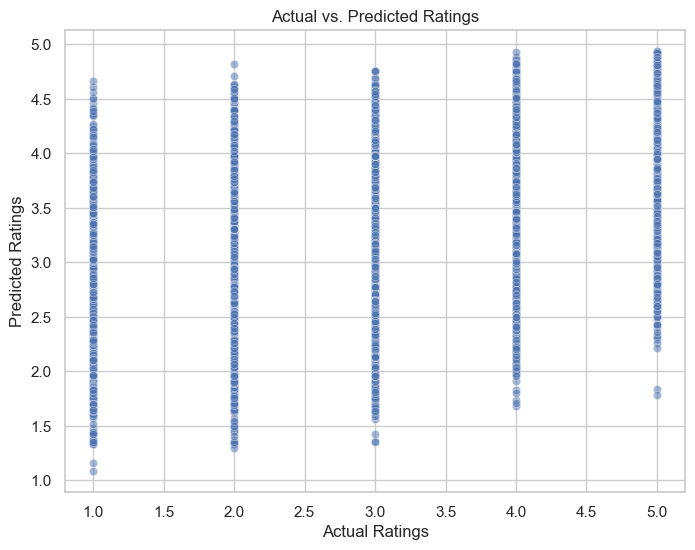

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_tuned, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Ratings")
plt.show()


### 🔍 Actual vs. Predicted Ratings

This scatter plot visualizes how well the model's predicted ratings align with actual user ratings.

- Each point represents a prediction for a given actual rating.
- The vertical clusters show actual ratings from 1 to 5.
- A well-performing model would produce points tightly clustered around a 45-degree diagonal line (perfect predictions).

In this case:
- Predictions generally align with actual values but exhibit some vertical spread.
- The model tends to slightly underestimate high ratings (e.g., predicting 4s instead of 5s).
- This pattern is common in regression problems where models tend to regress toward the mean.

Overall, the predictions are fairly accurate and consistent, though there's room for further improvement.


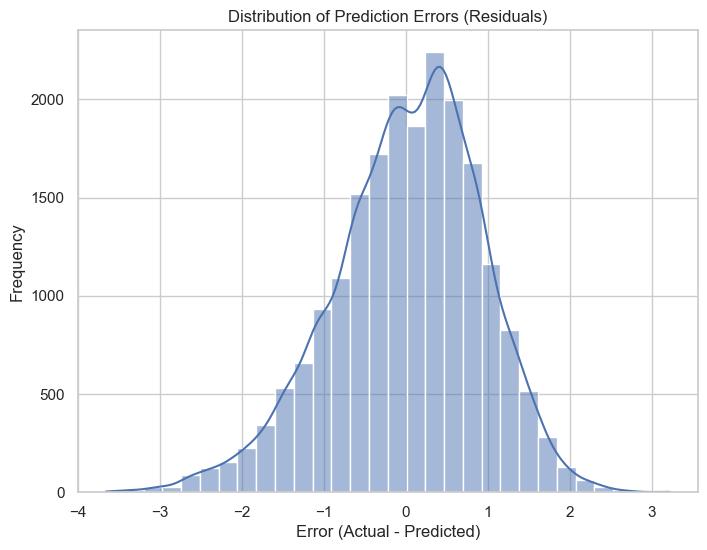

In [38]:
residuals = y_test - y_pred_tuned

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


### 📈 Residual Plot – Error Distribution

This plot shows the distribution of residuals (i.e., actual rating - predicted rating).

- The distribution is roughly bell-shaped and centered around 0, which indicates that the model is not biased — it doesn't consistently overpredict or underpredict.
- Most residuals fall within the range of -1 to +1, meaning predictions are usually accurate within 1 rating point.
- The slight left skew suggests a small number of overpredictions, but overall the errors are balanced and reasonably distributed.

This confirms that the model is generalizing well without major systematic errors.


# Step 10: Save the Model
Save the Final Model using pickle


In [39]:
import pickle

# Save the tuned model to a file
with open('movie_rating_model_random_forest.pkl', 'wb') as file:
    pickle.dump(best_model, file)
